## DELE CA1 Part B
Jayden Yap p2112790 

### Setup

In [1]:
import tensorflow as tf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#optional for dark mode graphs 
plt.style.use('dark_background')

### Data Processing
We will import both 'Fine' and 'Coarse' labels
Fine has 100 classes
Coarse has 20 classes
Hence two different y label types

Import data

In [3]:
# # if getting 'SSL' error below run this cell
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
(x_train, y_trainFine), (x_test, y_testFine) = tf.keras.datasets.cifar100.load_data(label_mode='fine')
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_trainFine.shape == (50000, 1)
assert y_testFine.shape == (10000, 1)
(_,y_trainCoarse), (_, y_testCoarse) = tf.keras.datasets.cifar100.load_data(label_mode='coarse')
assert y_trainCoarse.shape == (50000, 1)
assert y_testCoarse.shape == (10000, 1)

Import metadata (Label names)

In [5]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

data_meta = unpickle('data/metaData')

Divide by 255 to get scaled values 

In [6]:
x_train=x_train/255
x_test=x_test/255

Create validation set

In [7]:
x_trainOG=x_train #make copies of originals
y_trainFineOG=y_trainFine 
y_trainCoarseOG=y_trainCoarse
#we have to combine both coarse and fine labels before splitting
y_trainBoth=np.concatenate((y_trainFine,y_trainCoarse),axis=1)
from sklearn.model_selection import train_test_split 
x_train, x_valid, y_trainBoth, y_validBoth = train_test_split(x_train,y_trainBoth,test_size=5000,random_state=1) 
#then split back into seperate arrays for each label type
y_trainFine=np.expand_dims(y_trainBoth[:,0], -1)
y_trainCoarse=np.expand_dims(y_trainBoth[:,1],-1)
y_validFine=np.expand_dims(y_validBoth[:,0],-1)
y_validCoarse=np.expand_dims(y_validBoth[:,1],-1)
display(x_train.shape, x_valid.shape, y_trainFine.shape, y_trainCoarse.shape, y_validFine.shape, y_validCoarse.shape)

(45000, 32, 32, 3)

(5000, 32, 32, 3)

(45000, 1)

(45000, 1)

(5000, 1)

(5000, 1)

### EDA

Unpack label names from metadata into dictionary

In [8]:
subCategory100 = pd.DataFrame(data_meta['fine_label_names'], columns=['SubClass'])
subCategory100Dict = subCategory100.to_dict()

subCategory20 = pd.DataFrame(data_meta['coarse_label_names'], columns=['SubClass'])
subCategory20Dict = subCategory20.to_dict()

Visualise some images

In [9]:
y_testFine=np.asarray(y_testFine)

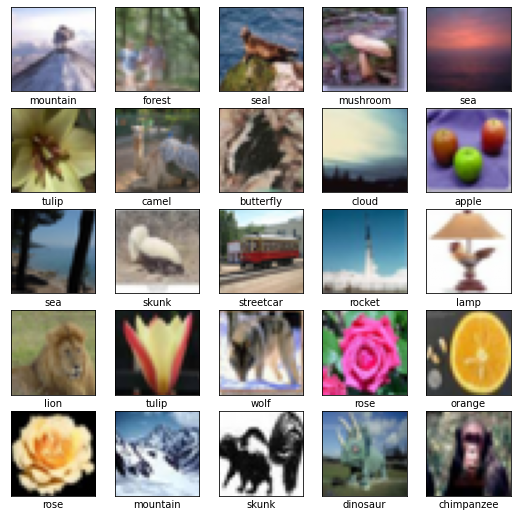

In [10]:
# Visualizing some examples
plt.figure(figsize=(9,9))
for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    j=i+0
    data_plot = x_test[j]
    plt.imshow(data_plot)
    plt.xlabel(str(subCategory100Dict['SubClass'][int(y_testFine[j])]))
plt.show()

Exploring the labels

In [11]:
def get_classes_distribution(x,y,labels):
    # Get the count for each label
    label_counts = pd.DataFrame(y)[0].value_counts()

    # Get total number of samples
    total_samples = len(y)

    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

In [12]:
print('100 CLASS SET:')
labels=subCategory100Dict['SubClass']
get_classes_distribution(x_test,y_testFine,labels)

100 CLASS SET:
mountain            :   100 or 1.0%
sweet_pepper        :   100 or 1.0%
plain               :   100 or 1.0%
shrew               :   100 or 1.0%
aquarium_fish       :   100 or 1.0%
man                 :   100 or 1.0%
cattle              :   100 or 1.0%
tank                :   100 or 1.0%
pine_tree           :   100 or 1.0%
skyscraper          :   100 or 1.0%
whale               :   100 or 1.0%
maple_tree          :   100 or 1.0%
crab                :   100 or 1.0%
forest              :   100 or 1.0%
mouse               :   100 or 1.0%
bus                 :   100 or 1.0%
caterpillar         :   100 or 1.0%
tractor             :   100 or 1.0%
orchid              :   100 or 1.0%
snake               :   100 or 1.0%
bowl                :   100 or 1.0%
trout               :   100 or 1.0%
ray                 :   100 or 1.0%
train               :   100 or 1.0%
possum              :   100 or 1.0%
lobster             :   100 or 1.0%
hamster             :   100 or 1.0%
television   

In [13]:
print('20 CLASS SET:')
labels=subCategory20Dict['SubClass']
get_classes_distribution(x_test,y_testCoarse,labels)

20 CLASS SET:
large_natural_outdoor_scenes:   500 or 5.0%
aquatic_mammals     :   500 or 5.0%
non-insect_invertebrates:   500 or 5.0%
large_man-made_outdoor_things:   500 or 5.0%
people              :   500 or 5.0%
fish                :   500 or 5.0%
trees               :   500 or 5.0%
household_furniture :   500 or 5.0%
vehicles_1          :   500 or 5.0%
food_containers     :   500 or 5.0%
reptiles            :   500 or 5.0%
large_carnivores    :   500 or 5.0%
household_electrical_devices:   500 or 5.0%
vehicles_2          :   500 or 5.0%
medium_mammals      :   500 or 5.0%
insects             :   500 or 5.0%
large_omnivores_and_herbivores:   500 or 5.0%
flowers             :   500 or 5.0%
fruit_and_vegetables:   500 or 5.0%
small_mammals       :   500 or 5.0%


Worth noting that for train and validation sets, the distribution wont be 100% uniform due to the random split

### Data Augmentation 
We will try to create more data that can be used to improve our model later

In [14]:
#function for easy visualisations of images
def imshow(img):
    # img=img.numpy().astype('uint8').squeeze()
    plt.axis("off")
    plt.imshow(img)
    plt.show()

If augmentation is very slow and shows warnings, run this below command and restart runtime

In [ ]:
# !pip install tensorflow==2.8.3

In [16]:
modelAug = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical", seed=1, input_shape=[32,32,3]),
  tf.keras.layers.RandomRotation(0.2, seed=1),
  tf.keras.layers.RandomZoom(-0.1,-0.1)
])
#process images in segments because my GPU not enough video memory
augImg1=modelAug(x_train[0:22500],training=True)
augImg2=modelAug(x_train[22500:],training=True)
augImg=tf.concat([augImg1,augImg2],0)

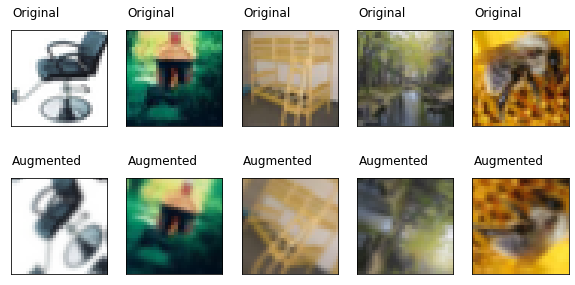

In [17]:
plt.figure(figsize=(10, 5))

for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.text(0,0,s='Original\n',fontsize=12)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].squeeze())
    label_index = y_trainFine[i]


n=0 #counter
for i in range(5,10):
    plt.subplot(2,5, i+1)
    plt.text(0,0,s='Augmented\n',fontsize=12)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(augImg[n])
    # .numpy().astype('uint8').squeeze()
    label_index=y_trainFine[n]
    n+=1
plt.show()
#now we have effectively doubled our training data from 50000 to 100000 images

Combine Original and Augmented

In [25]:
x_trainCombined.shape

(90000, 32, 32, 3, 1)

In [28]:
# x_trainCombined=np.concatenate((x_train.squeeze(),augImg.numpy().squeeze().astype('uint8')))
x_trainCombined=tf.concatenate((x_train,augImg.numpy()))
#do same for y training set 
y_trainCombinedFine=np.concatenate((y_trainFine,y_trainFine))
y_trainCombinedCoarse=np.concatenate((y_trainCoarse,y_trainCoarse))
print(f'x_trainCombined final shape: {x_trainCombined.shape}')
print(f'y_trainCombinedFine final shape: {y_trainCombinedFine.shape}')
print(f'y_trainCombinedCoarse final shape: {y_trainCombinedCoarse.shape}')

x_trainCombined final shape: (90000, 32, 32, 3)
y_trainCombinedFine final shape: (90000, 1)
y_trainCombinedCoarse final shape: (90000, 1)


Building Baseline Model

# Other stuff

In [ ]:
# # Create the model
# model = Sequential()
# model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(256, activation='relu'))
# model.add(tf.keras.layers.Dense(128, activation='relu'))
# model.add(tf.keras.layers.Dense(10, activation='softmax'))